In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('bestsellers.csv')

In [3]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
df.shape

(550, 7)

In [5]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [6]:
# Seaborn settings
sns.set_style("whitegrid")
sns.set_context("talk")

## Histograms

### User Rating

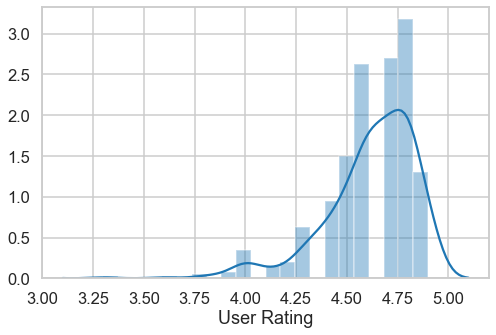

In [7]:
plt.figure(figsize=(8,5))
plt.tight_layout()

sns.distplot(df['User Rating'])
plt.savefig("Histogram for User Rating.png")

### Reviews

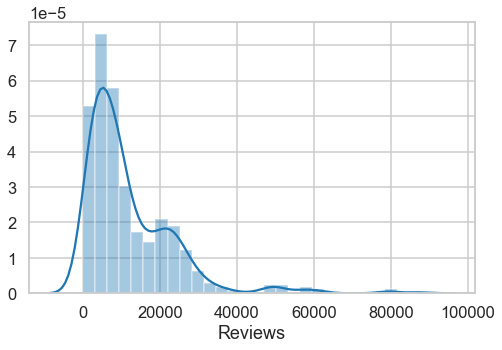

In [8]:
plt.figure(figsize=(8,5))
plt.tight_layout()

sns.distplot(df['Reviews'])
plt.savefig("Histogram for Reviews.png")

### Price

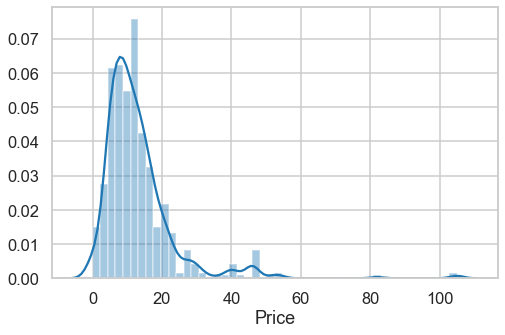

In [9]:
plt.figure(figsize=(8,5))
plt.tight_layout()

sns.distplot(df['Price'])
plt.savefig("Histogram for Price.png")

## Boxplot (Fiction vs Non Fiction)

### User Rating

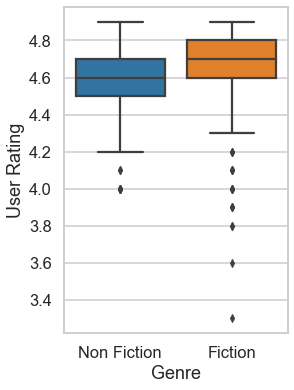

In [10]:
plt.figure(figsize=(4,6))
plt.tight_layout()

sns.boxplot(x='Genre', y='User Rating', data=df)
plt.savefig("User Rating (Fiction vs Non Fiction).png")

### Reviews

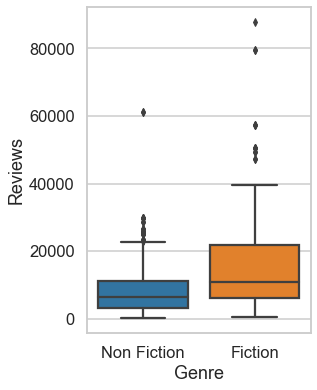

In [11]:
plt.figure(figsize=(4,6))
plt.tight_layout()

sns.boxplot(x='Genre', y='Reviews', data=df)
plt.savefig("Reviews (Fiction vs Non Fiction).png")

### Price

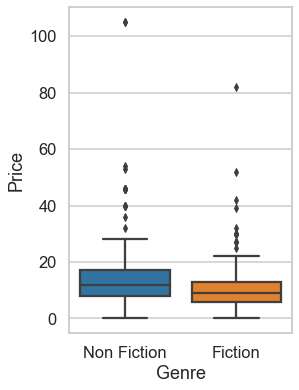

In [12]:
plt.figure(figsize=(4,6))
plt.tight_layout()

sns.boxplot(x='Genre', y='Price', data=df)
plt.savefig("Price (Fiction vs Non Fiction).png")

## Scatter plots

### User Rating and Reviews

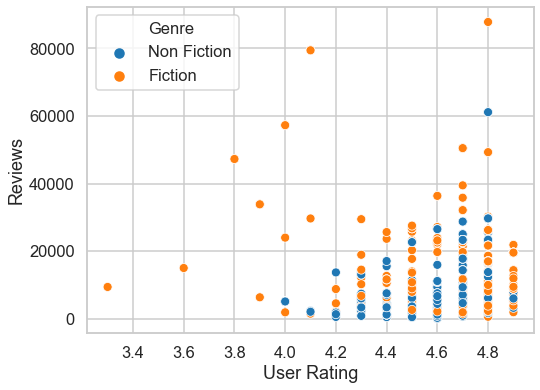

In [13]:
plt.figure(figsize=(8,6))
plt.tight_layout()

sns.scatterplot(x='User Rating', y='Reviews', hue='Genre', data=df)
plt.savefig("Scatter plot for User Rating and Reviews.png")

### Price and Reviews

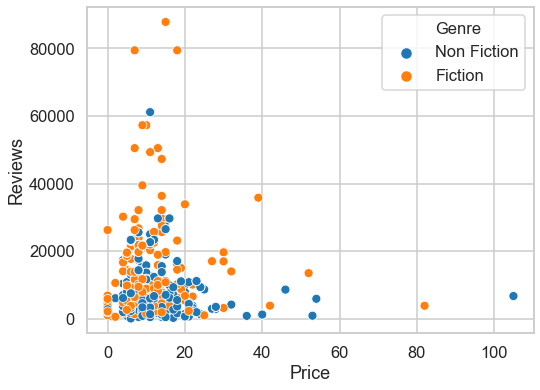

In [14]:
plt.figure(figsize=(8,6))
plt.tight_layout()

sns.scatterplot(x='Price', y='Reviews', hue='Genre', data=df)
plt.savefig("Scatter plot for Price and Reviews.png")

### Price and User Rating

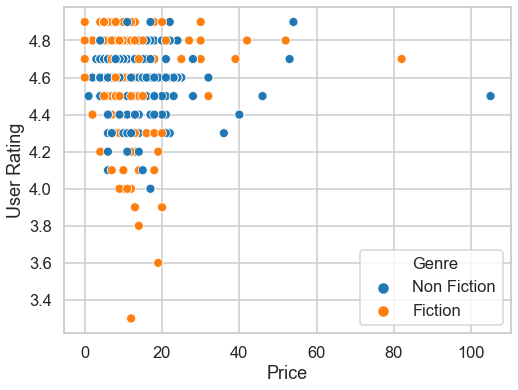

In [15]:
plt.figure(figsize=(8,6))
plt.tight_layout()

sns.scatterplot(x='Price', y='User Rating', hue='Genre', data=df)
plt.savefig("Scatter plot for Price and User Rating.png")

### Total Reviews for each Year

In [16]:
df['Year'].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

In [17]:
df_year = df.groupby(['Year']).sum()
df_year = df_year.reset_index()
df_year.head()

,Year,User Rating,Reviews,Price
0,2009,229.2,235506,770
1,2010,227.9,273981,674
2,2011,227.9,405041,755
3,2012,226.6,654546,765
4,2013,227.7,654907,730


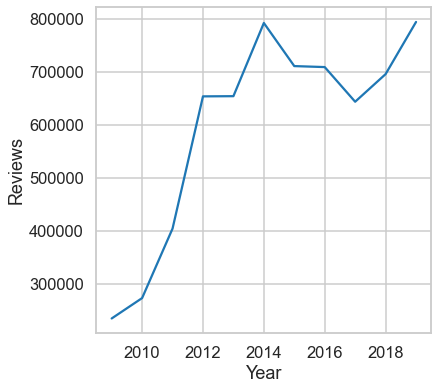

In [18]:
plt.figure(figsize=(6,6))
plt.tight_layout()

sns.lineplot(x='Year', y='Reviews', data=df_year)
plt.savefig("Total Reviews per Year.png")

## Authors with most reviews (Top 5)

In [22]:
author_reviews = df.groupby('Author').sum()
author_reviews = author_reviews.reset_index()
author_reviews = author_reviews[['Author', 'Reviews']]
author_reviews.head()

,Author,Reviews
0,Abraham Verghese,9732
1,Adam Gasiewski,3113
2,Adam Mansbach,9568
3,Adir Levy,8170
4,Admiral William H. McRaven,10199


In [23]:
# sorting in the descending order
author_reviews = author_reviews.sort_values(by=['Reviews'], ascending=False)
author_reviews.head()

,Author,Reviews
226,Suzanne Collins,278329
128,John Green,210419
76,E L James,178011
73,Dr. Seuss,176545
100,Gillian Flynn,171813


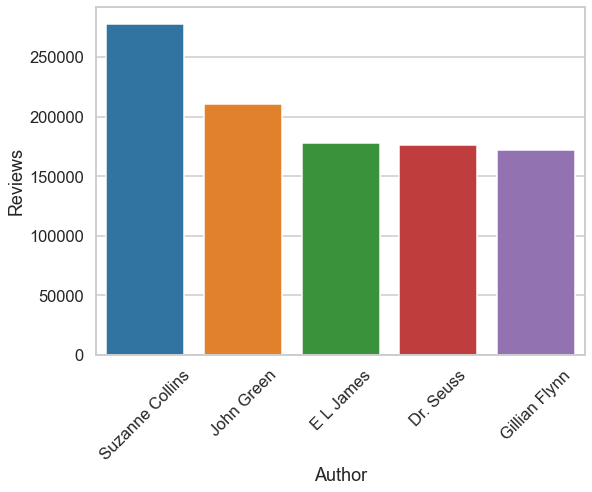

In [26]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
plt.tight_layout()

sns.barplot(x='Author', y='Reviews', data=author_reviews[0:5])
plt.savefig("Authors with most reviews (Top 5).png")